## 資料預處理

雖然好的模型和參數可以提高成效，但通常最關鍵還是資料本身。基本上資料的品質決定了八成以上模型的成效，因此大家有必要對自己的資料有所認識和了解。

而在做機器學習的問題，花費最多的通常也是資料處理；我們如果做好資料處理甚至可以大幅提升模型成效。

本章會引導大家認識常用的資料處理的方式，包含常用的 pandas 和 sklearn 套件。

### 1. 資料檢視

In [25]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
train = pd.read_csv('train.csv')
profile = ProfileReport(train, title="Pandas Profiling Report")

In [3]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Saving the report
profile.to_file("titantic_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
train['Sex_encoder'] = train.Sex.apply(lambda x: 1 if x=='male' else 0)

In [6]:
train.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Sex_encoder     0.042939 -0.543351  0.131900  0.093254 -0.114631 -0.245489   

                 Fare  Sex_encoder  
PassengerId  0.012658     0.042939  
Survived     0.257307    -0.543351  
Pclass      -0.549500     0.131900  
Age          0.096067     0.093254  
SibSp        0.159651    -0.114631  
Parch        0.216225    -0.245489  
Fare         1.000000    -0.182333  
Sex_encoder -0.182333     1.000000

相關係數 r 介於 -1~1之間
- 當 r >0 表示正相關；當 r < 0 表示負相關
- 當 r = 0 表示兩變數之前為無線性相關
- 當 |r| <= 0.4 表示兩變數之間為低度相關
- 當 0.4 <= |r| <0.7 表示兩變數之間為顯著性相關
- 當 |r| > 0.7 表示兩變數之間為高度相關
- 當 |r| = 1 表示兩變數之間為完全線性相關

我們大概先從相關係數得知以下事情：

- Pclass 和 Fare 是顯著性相關
- Pclass 和 Survived 是有低度相關
- Pclass 和 Age 是低度相關
- Parch 和 SibSp 是有顯著性相關
- Sex 和 Survived 有相關

發現 Survived 跟 Pclass 、 Sex 有關係，這與我們要預測的方向會很有關係

從下圖我們得知，在 Pclass 為 3 的死亡人數相當高

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

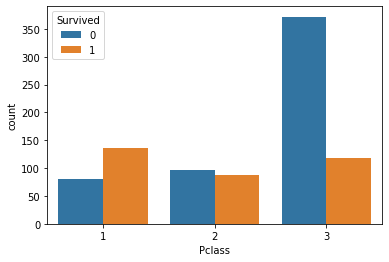

In [7]:
sns.countplot(train['Pclass'], hue=train['Survived'])

我們發現，男生存活人數較少

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

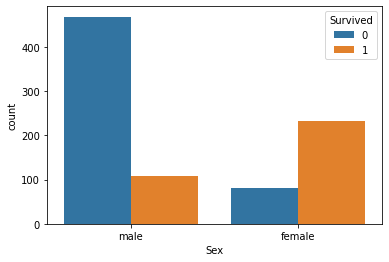

In [8]:
sns.countplot(train['Sex'], hue=train['Survived'])

由於 Embarked 與 Pclass 有相關(from report)，我們也來看看

發現從 S 港登船者，死亡人數較高

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

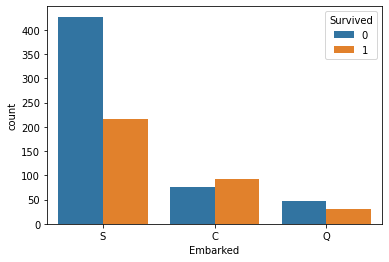

In [9]:
sns.countplot(train['Embarked'], hue=train['Survived'])

### 2.處理遺漏值

#### 查看遺漏值

In [10]:
total = train.isnull().sum().sort_values(ascending=False)
print(total)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Sex_encoder      0
dtype: int64


In [11]:
# 或是調整成百分比型式
percent =(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000
Pclass           0  0.000000
Name             0  0.000000
Sex              0  0.000000
SibSp            0  0.000000
Parch            0  0.000000
Ticket           0  0.000000
Fare             0  0.000000
Sex_encoder      0  0.000000

遺漏值的處理有很多，通常有以下
- 用其他的均值來填補遺漏值，例如平均數、中位數、眾數，我們可以依照資料特性填補
- 使用特殊值來填補離漏值，如-1 通常不要重複就好，把遺漏值歸類成一個類別
- 忽略有缺失值的樣本，直接把該欄位 drop 。若遺漏值太多且該欄位也無相關性應該可以 drop
- 使用其他欄位的均值添補遺漏值，例如可以利用其他欄位去簡單計算該欄位的值
- 使用另外的機器學習演算法預測缺失值，例如可以利用其他欄位去預測該欄位的值

#### 清除遺漏值方法

In [27]:
# 使用 dropna
## 預設是只有有空值就刪掉那筆
train.dropna()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [28]:
# 使用 dropna
## 要全部為空才清楚那一筆資料
train.dropna(how='all')

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [31]:
# 使用 dropna
## 可以指定作用在哪一行
train.dropna(subset=['Fare'])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

#### 填補遺漏值方法

In [33]:
# 使用 fillna
## 空值都填上 -1
train.fillna(-1)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  -1.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500    -1        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250    -1        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500    -1        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000    -1        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500    -1        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500    -1        Q  

[891 rows x 12 columns]

In [35]:
# 使用 fillna
## 填上平均數
print(train['Age'].mean())
train['Age'].fillna(train['Age'].mean())

29.69911764705882


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [36]:
# 用上下資料進行填補
## 前一個數據進行填充
train.Cabin.fillna(method='pad')

0       NaN
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

In [37]:
# 用上下資料進行填補
## 後一個數據進行填充
train.Cabin.fillna(method='bfill')

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [39]:
# 用插值法
train.Age.interpolate()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

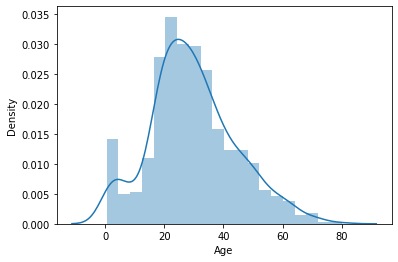

In [42]:
sns.distplot(train.Age, kde=True)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

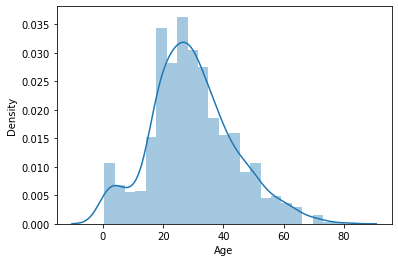

In [44]:
sns.distplot(train.Age.interpolate(method ='linear'), kde=True)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

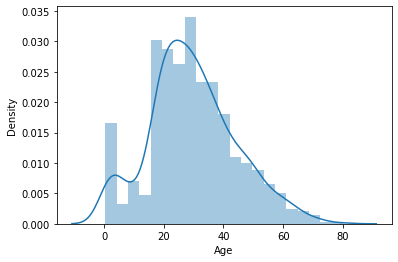

In [46]:
sns.distplot(train.Age.interpolate(method ='nearest'), kde=True)

#### 實際演練

<AxesSubplot:xlabel='Embarked', ylabel='count'>

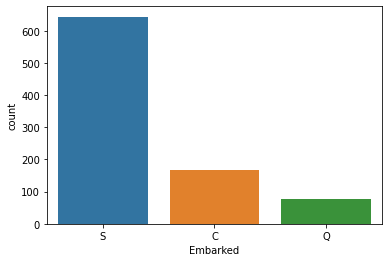

In [12]:
sns.countplot(x="Embarked", data=train)

In [51]:
# 使用出現次數最多的值填補
train['Embarked'] = train['Embarked'].fillna('S')

In [52]:
# 使用平均數填補
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [53]:
# 使用中位數填補
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

In [54]:
# 由於 Cabin 遺漏值太多，與 Survived 似乎較無關係
train = train.drop(['Cabin'], axis = 1)

### 3.離群值處理

我們需要建立一個門檻值去界定離群值，因此我們將資料進行標準化

In [55]:
from sklearn.preprocessing import StandardScaler
#standardizing data
scaled = StandardScaler().fit_transform(train['Age'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.25315549]
 [-2.2339169 ]
 [-2.22776055]
 [-2.22776055]
 [-2.2216042 ]
 [-2.2216042 ]
 [-2.21467831]
 [-2.20852197]
 [-2.20852197]
 [-2.20852197]]

outer range (high) of the distribution:
[[2.71655648]
 [2.71655648]
 [2.79351083]
 [3.10132824]
 [3.10132824]
 [3.13980541]
 [3.17828259]
 [3.17828259]
 [3.40914564]
 [3.87087174]]


/var/folders/6z/78qztb0d4pz7czys_z23r_280000gn/T/ipykernel_55174/2827770766.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scaled = StandardScaler().fit_transform(train['Age'][:,np.newaxis]);


<AxesSubplot:xlabel='Age'>

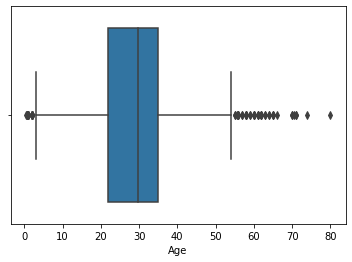

In [56]:
sns.boxplot(x=train["Age"])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


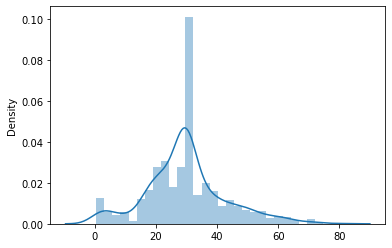

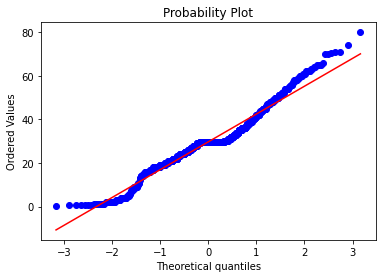

In [59]:
from scipy import stats
sns.distplot(x=train["Age"])
fig = plt.figure()
res = stats.probplot(train['Age'], plot=plt)

### 3. 特徵縮放

### 4. 資料切割 (train-test-split)

### 5. 參考資料
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python